<a href="https://colab.research.google.com/github/DLPY/Regression-Session-1/blob/master/EDA_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Exploratory Data Analysis using Python

## 1. Packages in Python

A python package is a collection of modules that can be used to provide additional functions and features in a program. When a module from an external package is required in a program, that package can be imported and its modules can be put to use.

A custom python package can be created by a user, however there are various packages already available that provide users various useful functions.

Some popular python packages and their use:
1. Pandas - Provides access to efficient data structures for structured and time-series data
2. Numpy - Provides access to N-dimensional arrays and other useful numerical tools
3. Matplotlib -Helps developers create stunning visualizations
4. SciPy - Provides tools and libraries for mathematical, engineering, and scientific calculations
5. Scikit-Learn - Provides various functions to implement machine learning and data mining tasks
6. Beautiful Soup - Scrapes all or specified data from web pages
7. TensorFlow - Provides the necessary tools for Machine Learning projects

In [ ]:
#importing the packages
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Loading your data

The next step in the process is to load the data in python. The following different functions in pandas help in reading different files
1. CSV file - pd.read_csv()
2. MS Excel - pd.read_excel()
3. JSON - pd.read_json()
4. HTML - pd.read_html()

In [ ]:
# CSV is first read in from a github raw file another option is to import the notebook to your session storage by click on the file icon on left toolbar then importing csv
! wget https://raw.githubusercontent.com/DLPY/Regression-Session-1/master/Data/netflix_titles.csv

In [ ]:
#reading the input file
netflix_df = pd.read_csv('netflix_titles.csv',sep=",")

## 3. Basic Data Exploration

In this step we will perform some basic operations to check what the dataset comprises of. The following funtions will be used:
    
1. head()/tail() - The head/tail function will tell you the top/bottom records in the data set. By default, python shows you only the top 5/bottom 5 records.

2. shape - The shape attribute tells us a number of records and features we have in the data set. It is used to check the dimension of data.

3. info() - The info funtion provides us the Information about the data and the datatypes of each respective attribute.

4. describe() - The described method will help to see how data has been spread for numerical values e.g - the minimum value, mean values, different percentile values, and maximum values.

In [ ]:
# The top 5 records
netflix_df.head()

In [ ]:
# The bottom 10 records
netflix_df.tail(10)

## Dataset

netflix_titles.csv: The csv file contains information about the various movies and the data related to them.

1. Show ID - unique ID of that particular show
2. Type - type of the video - movie, TV Series etc.
3. Title - title of the video
4. Director - director name
5. Cast - cast members
6. Country - country where content was produced.
7. Data Added - date when it became live on netflix
8. Release Year - year of release
9. Rating - user rating
10. Duration - duration of the movie, TV Series etc.
11. Listed in - Genre information
12. Description - concise plot of the series

In [ ]:
#The number of records and columns in the dataset : 8807 rows and 12 columns
print(netflix_df.shape)

In [ ]:
#basic information regarding the column datatypes
netflix_df.info()

In [ ]:
#The analysis of the numeric variables in the dataset. Only release year is numeric in this dataset.
netflix_df.describe()
#This shows we have content on netflix from 1925-2021 in this dataset

## 4. Basic Data Manipulation

**Renaming all the columns**

In [ ]:
#check column names
netflix_df.columns

In [ ]:
#update all columns
netflix_df.columns = ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'show_description']

In [ ]:
#check updated column names
netflix_df.columns

**Renaming single/multiple columns**

The rename() method of pandas can be used to rename one or more columns.DataFrame to change column / index name individually.

In [ ]:
#renaming 2 columns
netflix_df=netflix_df.rename(columns={'cast': 'show_cast', 'rating': 'show_rating'})

In [ ]:
#check updated column names
netflix_df.columns

**Remove a column**

The drop() method of pandas can be used to remove columns by specifying the column names

In [ ]:
#drop column 'duration' from the dataframe
netflix_df = netflix_df.drop(['duration'], axis = 1)

In [ ]:
#check column names to see if the column 'duration' exists
netflix_df.columns

**Changing data type of a column**

In [ ]:
#basic information regarding the column datatypes ; the datatyoe of 'date-added' is object type
netflix_df.info()

In [ ]:
#change data type of the column to datetime
netflix_df[['date_added']] = pd.to_datetime(netflix_df['date_added'])

In [ ]:
#basic information regarding the column datatypes
netflix_df.info()

**Group and Count**



In [ ]:
#Group the column by year and count the occurrences 
grouped_df = netflix_df.groupby(['release_year'], as_index=False).agg(Count=('show_id', 'count'))

In [ ]:
#check the dataframe
grouped_df.info()

In [ ]:
#check the first few rows
grouped_df.head()

## 5. Train-Test, Split

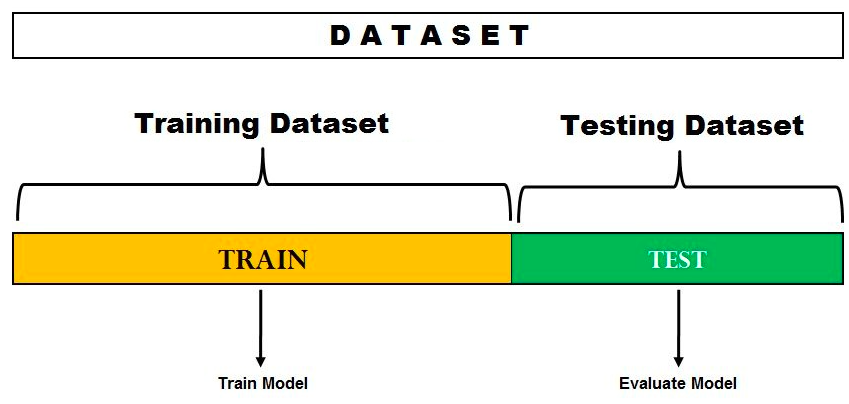

The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model. It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms for your predictive modeling problem. 

The train-test split procedure is appropriate when you have a very large dataset, a costly model to train, or require a good estimate of model performance quickly.

We will use the scikit-learn machine learning library to perform the train-test split procedure.



In [ ]:
# Independent Variable
X = netflix_df.drop(['release_year'],axis=1).values

# Depenedent Variable
y = netflix_df.release_year.values

# Split Observations in 80% training set 20% test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=21)

In [ ]:
#The number of records and columns in the training dataset
X_train.shape

In [ ]:
#The number of records and columns in the test dataset
X_test.shape

In [ ]:
#The number of records in the training dependent variable
y_train.shape

In [ ]:
#The number of records in the testing dependent variable
y_test.shape

In [ ]:
#check training dataset
X_train

In [ ]:
#check training dependent variable
y_train

## 6. Visualization

In [ ]:
#using matplotlib to create a simple bar chart
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(grouped_df.release_year,grouped_df.Count)
plt.show()